In [ ]:
import sklearn.datasets
from sklearn import neighbors, tree, cluster
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import itertools as it

## Loading example data: Iris plants dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [ ]:
iris = sklearn.datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.data.shape, iris.data[:5]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

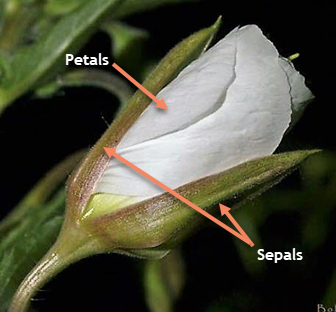

In [ ]:
from IPython import display
display.Image("https://plantid.net/Classic/Glossary/Sepal_files/image001.png")

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target.shape, np.unique(iris.target, return_counts=True)

((150,), (array([0, 1, 2]), array([50, 50, 50])))

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Plot feature combinations + labels

In [ ]:
def draw_scatter(data, labels, x_feature, y_feature, class_names=None): # Change default to None
    # Unique classes in the labels
    unique_labels = set(labels)

    # Plot each class with a separate color and label
    for label in unique_labels:
        # Select indices of data points with the current label
        idx = labels == label
        if class_names is not None: # Check if class_names is not None
            plt.scatter(data[idx, x_feature], data[idx, y_feature], alpha=0.5, s=100, label=class_names[label])
        else:
            plt.scatter(data[idx, x_feature], data[idx, y_feature], alpha=0.5, s=100)

    plt.xlabel(iris.feature_names[x_feature])
    plt.ylabel(iris.feature_names[y_feature])
    if class_names is not None: # Check if class_names is not None
        plt.legend()  # Add a legend
    plt.show()

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


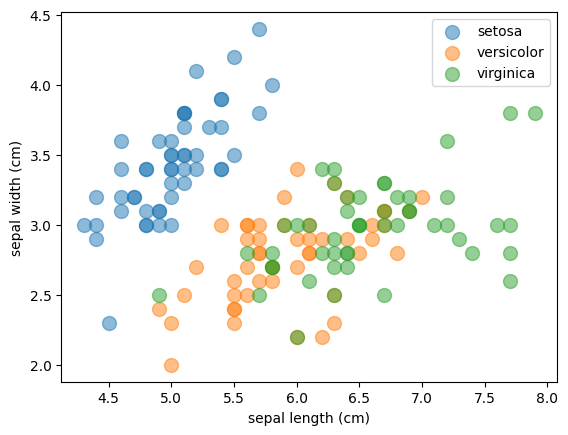

(0, 'sepal length (cm)') (2, 'petal length (cm)')


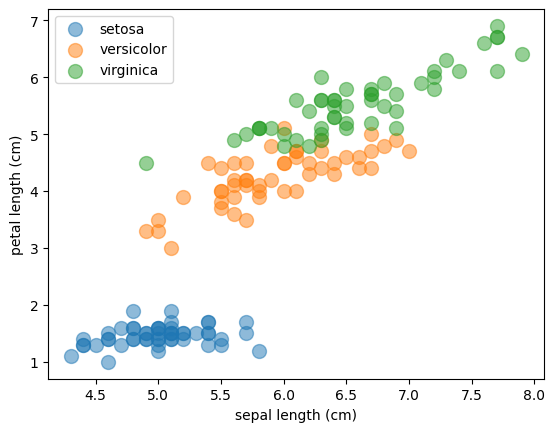

(0, 'sepal length (cm)') (3, 'petal width (cm)')


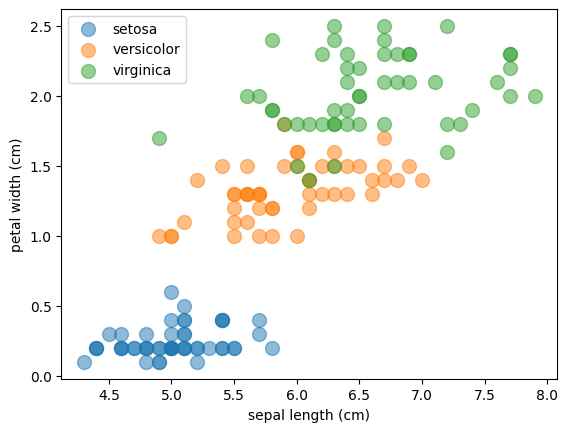

(1, 'sepal width (cm)') (2, 'petal length (cm)')


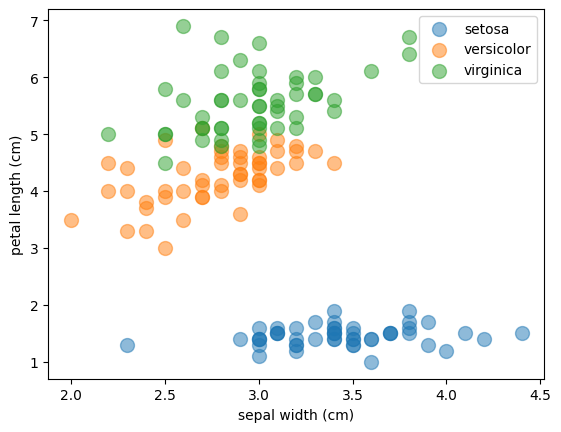

(1, 'sepal width (cm)') (3, 'petal width (cm)')


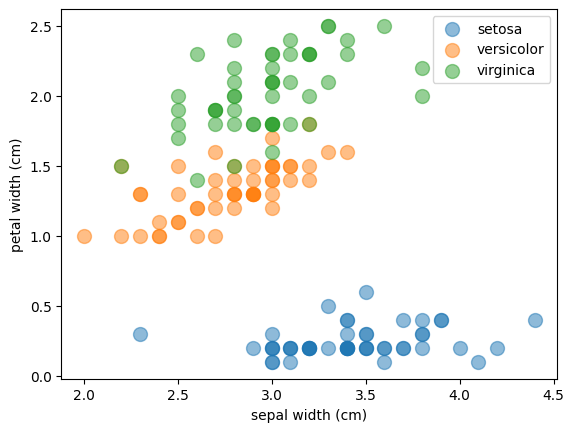

(2, 'petal length (cm)') (3, 'petal width (cm)')


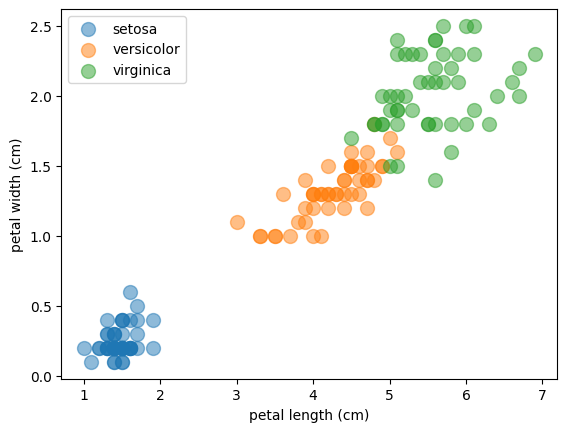

In [ ]:
# visualize each pair of features and how well they discriminate the three classes
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print (i, j)
    draw_scatter(iris.data, iris.target, i[0], j[0], iris.target_names)

## ML Technique 1: Supervised Learning
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [ ]:
# Instantiate Decision Tree classifier
clf = tree.DecisionTreeClassifier()

In [ ]:
clf

DecisionTreeClassifier()

In [ ]:
print ('feature names : ',iris.feature_names)
print ('label names: ',iris.target_names)
print('labels : ',iris.target)

feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
label names:  ['setosa' 'versicolor' 'virginica']
labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Cross-validation and model evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
https://scikit-learn.org/stable/modules/model_evaluation.html  

In [ ]:
def draw_confusion_matrix(y_test, y_pred, display_labels=None):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
    disp.plot()
    plt.show()

In [ ]:
# K-fold cross-validator construction
kf = KFold(n_splits=5, shuffle=True, random_state=123)

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.75      1.00      0.86         6
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



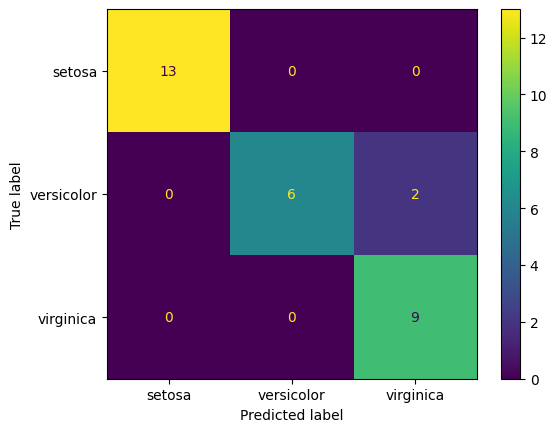

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



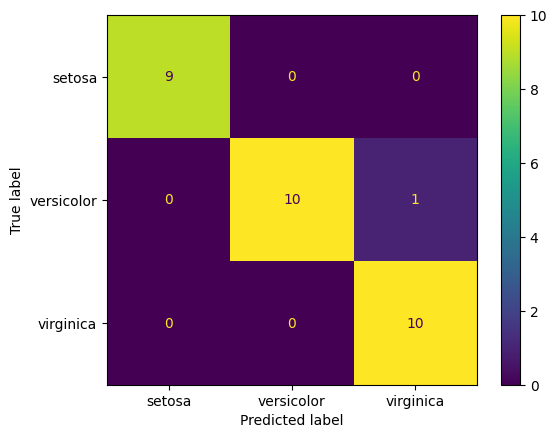

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



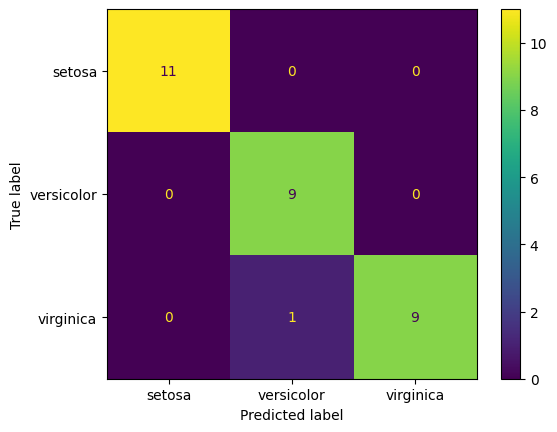

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



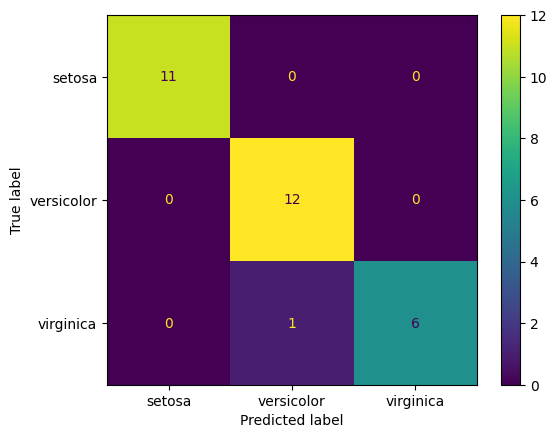

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.83      0.91      0.87        11
   virginica       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30



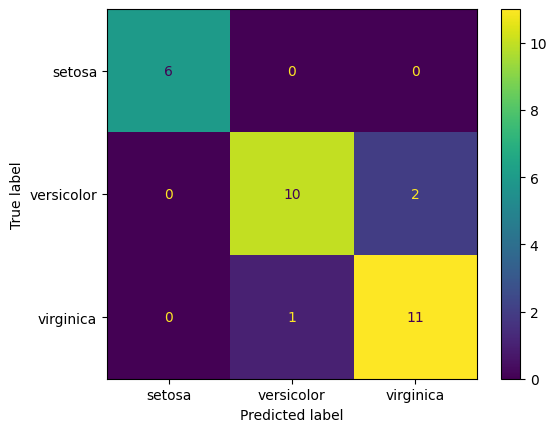

In [ ]:
accuracy_scores = []
for train_index, test_index in kf.split(iris.data):
    clf = tree.DecisionTreeClassifier(max_depth=3)
    print("TRAIN SAMPLE SIZE:", len(train_index))
    print("TEST SAMPLE SIZE:", len(test_index))
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    train_pred = clf.predict(X_train)

    print ('Prediction: ', y_pred)
    print ('Correct:    ', y_test)
    print ('Accuracy:', accuracy_score(y_pred, y_test))
    print (classification_report(y_test, y_pred, target_names=iris.target_names))

    draw_confusion_matrix(y_pred,y_test,iris.target_names)
    acc = accuracy_score(y_pred,y_test)
    accuracy_scores.append(acc)

In [ ]:
# Assuming clf is your trained DecisionTreeClassifier object
# To print out the decision rules as text
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.70
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.75
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



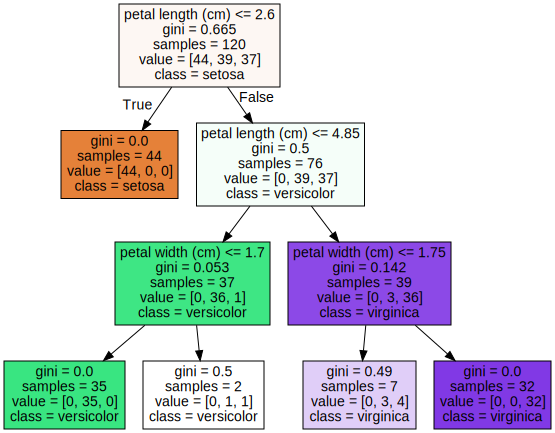

In [ ]:
import graphviz

# To visualize the tree using graphviz (you must have graphviz installed)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,  # replace with your feature names
                                class_names=iris.target_names,  # replace with your class names
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")

# If you want to directly display the graph here (in a Jupyter notebook for instance), you can use
graph


In [ ]:
accuracy_scores

[0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9]

In [ ]:
'{:.2f} +/- {:.3f}'.format(np.mean(accuracy_scores), np.std(accuracy_scores))

'0.95 +/- 0.027'

In [ ]:
cv_scores = []
# K-fold cross validation and performance evaluation

for max_depth in [5,8,10,13,15]:
    accuracy_scores = []
    for train_index, test_index in kf.split(iris.data):
        clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        X_train, X_test = iris.data[train_index], iris.data[test_index]
        y_train, y_test = iris.target[train_index], iris.target[test_index]

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)

        acc = accuracy_score(y_pred,y_test)
        accuracy_scores.append(acc)
    cv_scores.append({'acc': np.mean(accuracy_scores), 'max_depth' : max_depth})

In [ ]:
cv_scores

[{'acc': 0.9533333333333334, 'max_depth': 5},
 {'acc': 0.96, 'max_depth': 8},
 {'acc': 0.9533333333333334, 'max_depth': 10},
 {'acc': 0.96, 'max_depth': 13},
 {'acc': 0.9533333333333335, 'max_depth': 15}]

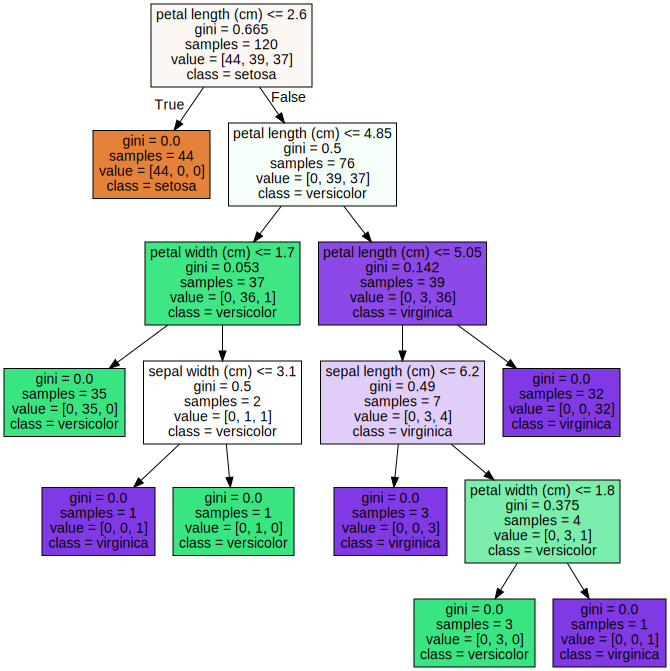

In [ ]:
# To visualize the tree using graphviz (you must have graphviz installed)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,  # replace with your feature names
                                class_names=iris.target_names,  # replace with your class names
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")

# If you want to directly display the graph here (in a Jupyter notebook for instance), you can use
graph


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_percentage_error, explained_variance_score

#### Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.30)

In [ ]:
rf =  RandomForestClassifier(n_estimators=100, max_depth=10)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



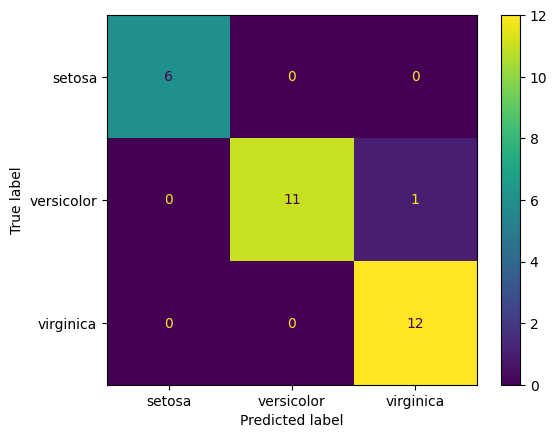

In [ ]:
print("TRAIN SAMPLE SIZE:", len(train_index))
print("TEST SAMPLE SIZE:", len(test_index))
X_train, X_test = iris.data[train_index], iris.data[test_index]
y_train, y_test = iris.target[train_index], iris.target[test_index]

clf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

print ('Prediction: ', y_pred)
print ('Correct:    ', y_test)
print ('Accuracy:', accuracy_score(y_pred, y_test))
print (classification_report(y_test, y_pred, target_names=iris.target_names))

draw_confusion_matrix(y_pred,y_test,iris.target_names)

# * Regression Problem : California housing price

In [ ]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
len(california.data)

20640

In [ ]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.20)

In [ ]:
rf =  RandomForestRegressor(n_estimators=100, max_depth=10)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [ ]:
rf.feature_importances_

array([0.58778454, 0.04940409, 0.03227819, 0.01753045, 0.01818262,
       0.14125979, 0.07595225, 0.07760808])

In [ ]:
# R^2
rf.score(X_test, y_test)

0.7817504796267727

In [ ]:
# similar to R^2
explained_variance_score(y_test, rf.predict(X_test))

0.7817815828608832

In [ ]:
# regression loss measures
mean_absolute_percentage_error(y_test, rf.predict(X_test))

0.21739181448306338